<a href="https://colab.research.google.com/github/willakuffo/ghs-usd_timeseries/blob/master/ghforex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># ghforex
This notebook is used to make some exploratory data anlaysis on [data](https://finance.yahoo.com/quote/GHS%3DX/history?p=GHS%3DX) based on the exchange rate of the Ghana Cedi `GHS` and the US Dollar `$ USD` 
[Source](https://finance.yahoo.com/quote/GHS%3DX/history?p=GHS%3DX)




## `Relevant` *Features or Columns* 




>`Date   ` Date the row was sampled

>`Open   ` Open market exchange rate on that day

>`Close  ` Close market exchange rate on that day

>`High  ` Highest market exchange rate on that day

>`Low  ` Lowest market exchange rate on that day









In [8]:

#load and read data as dataframe using pandas

import pandas as pd
df = pd.read_csv("ghusd.csv")



In [9]:
#data head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-07-11,0.89961,0.90289,0.89840,0.90216,0.90216,0.0
1,2007-07-12,0.90220,0.90986,0.89935,0.90834,0.90834,0.0
2,2007-07-13,0.90831,0.91186,0.90801,0.91120,0.91120,0.0
3,2007-07-16,0.91186,0.91239,0.90733,0.90862,0.90862,0.0
4,2007-07-17,0.90868,0.91120,0.90733,0.90975,0.90975,0.0


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3435,2020-09-09,5.76137,5.76137,5.74000,5.7400,5.7400,0.0
3436,2020-09-10,5.73164,5.75920,5.73164,5.7400,5.7400,0.0
3437,2020-09-11,5.76037,5.76037,5.74000,5.7400,5.7400,0.0
3438,2020-09-14,5.77092,5.77092,5.74000,5.7400,5.7400,0.0
3439,2020-09-15,5.72900,5.77000,5.72900,5.7295,5.7295,0.0


In [11]:
# describe some statistical variables of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000,3429.0
mean,2.947887,3.138920,2.933735,3.159399,3.159399,0.0
std,1.561181,7.131101,1.553151,10.180028,10.180028,0.0
min,0.899610,0.902890,0.600000,0.902160,0.902160,0.0
25%,1.462000,1.467600,1.456400,1.461900,1.461900,0.0
50%,2.488300,2.521900,2.482300,2.485000,2.485000,0.0
75%,4.364700,4.400000,4.355600,4.370000,4.370000,0.0
max,5.818130,380.000000,5.763620,573.000000,573.000000,0.0


There is a little chance that the statistical description of the data above may be slightly inaccurate due to outliers and missing values which may affect the values of the mean and standard deviations.

In [12]:
old_means,old_stds = {},{}
for column in df.columns[1:len(df.columns)]:
  old_means[column] = df.describe()[column]['mean']
  old_stds[column] = df.describe()[column]['std']

print('means ',old_means,'\nstds: ',old_stds)

means  {'Open': 2.9478868737241166, 'High': 3.1389198568095655, 'Low': 2.933735138524343, 'Close': 3.159398772236793, 'Adj Close': 3.159398772236793, 'Volume': 0.0} 
stds:  {'Open': 1.561181410587833, 'High': 7.131100572758862, 'Low': 1.5531514803472342, 'Close': 10.18002828652738, 'Adj Close': 10.18002828652738, 'Volume': 0.0}


In [13]:
#some extra information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3440 non-null   object 
 1   Open       3429 non-null   float64
 2   High       3429 non-null   float64
 3   Low        3429 non-null   float64
 4   Close      3429 non-null   float64
 5   Adj Close  3429 non-null   float64
 6   Volume     3429 non-null   float64
dtypes: float64(6), object(1)
memory usage: 188.2+ KB


In [14]:
#shape of dataset
df.shape

(3440, 7)

In [15]:
#what data types in columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [16]:
# see which columns have missing or null values
df.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [17]:
#check sum of all null values in columns
df.isnull().sum()

Date          0
Open         11
High         11
Low          11
Close        11
Adj Close    11
Volume       11
dtype: int64

In [18]:
#percentage of data left if nulls are dropped in each coloumn of this dataset
null = 11 #no of total null values in each column
p = (df.shape[0] - null)/df.shape[0]
print("fraction of data to be dropped     :",p,'\nfraction of data that will be left :',1-p)

fraction of data to be dropped     : 0.9968023255813954 
fraction of data that will be left : 0.0031976744186046346


This percentage loss seems very insignificant if missing values are dropped. but i personally like to handle them by interpolating or handling with means


			Visualize exchange rates



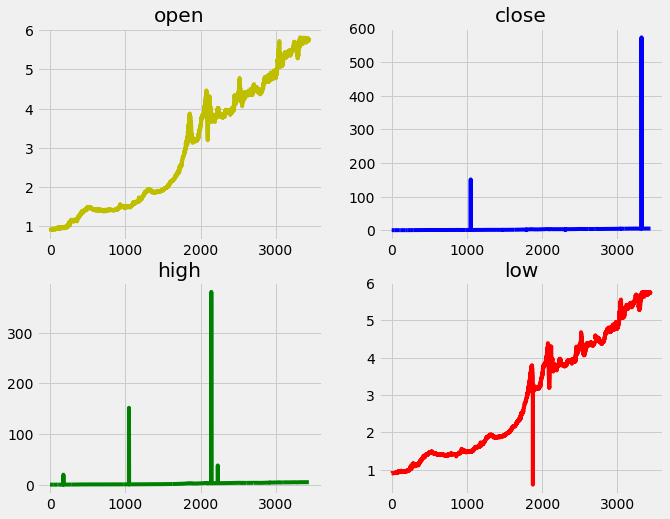

In [19]:
print('\t\t\tVisualize exchange rates\n')


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig,axes= plt.subplots(2,2,figsize = (10,8))
axes[0,0].plot(range(df.shape[0]),df['Open'].values,color = 'y')
axes[0,1].plot(range(df.shape[0]),df['Close'].values,color = 'b')
axes[1,0].plot(range(df.shape[0]),df['High'].values,color = 'g')
axes[1,1].plot(range(df.shape[0]),df['Low'].values,color = 'r')
axes[0,0].set_title("open")
axes[0,1].set_title("close")
axes[1,0].set_title("high")
axes[1,1].set_title("low")


plt.show()


It is quite clear that `close`,`high` and `low` columns in the forex dataset have abnormal values. These are anomalies or outliers

In [20]:
#get the date corresponding to a particular point on the x axis or row
def getDate(row_no):
    '''Get the date of a particular sample or row  
    '''
    return df['Date'][row_no]
  

In [21]:
#get date at the nth data point or nth row in the df or  axis
row_index = 60
print('The date at the '+str(row_index)+'th is',getDate(row_index))

The date at the 60th is 2007-10-03


In [22]:
def getRow(date):
  '''yy-mm-dd'''
  return df.index[df['Date']== date][0]


In [23]:
date = '2007-10-03'
print('The row index of '+str(date)+'th is',getRow(date))

The row index of 2007-10-03th is 60


In [24]:

def zoom(scope = [0,100],column  = None,from_ = None,to = None):
  
    '''allows you to zoom into the data given a scope or range
    if from and to are not None, 
    from  or to (format) = yy-mm-dd
    dates are sed rather than scope
  
    '''
    start = scope[0]
    end = scope[1]

    if from_ !=None and to !=None:
      start = df.index[df['Date']== from_][0]
      end = df.index[df['Date']== to][0]
      print('zoomed from',from_,'to',to)
       
                                                                                                                                                                                                                                               
    print('zoomed in, from ',start,' to ',end)
    plt.figure(figsize=(8,6))
    plt.title(column)
    plt.plot(list(range(df.shape[0])[start:end]),list(df[column])[start:end])
    #plt.plot(list(range(df.shape[0])),list(df[column]))

    plt.show()

zoomed in, from  100  to  200


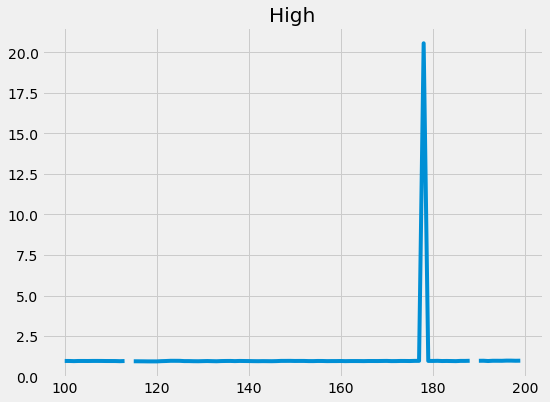

In [25]:
#visualize portions
#zoom(column = "High",from_ = "2016-01-01",to = '2019-02-01')#scope = [100,200])
zoom(column = 'High',scope=[100,200])

zoomed from 2016-01-01 to 2019-02-01
zoomed in, from  2212  to  3017


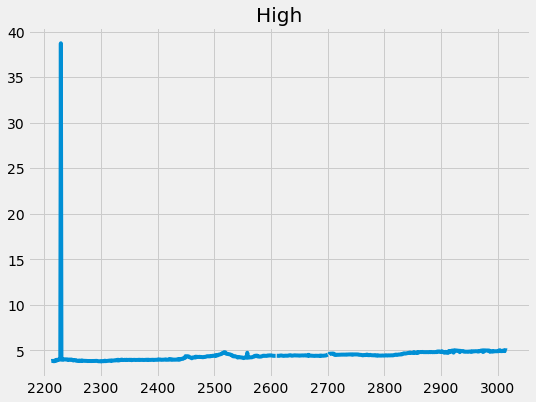

In [26]:
zoom(column = "High",from_ = "2016-01-01",to = '2019-02-01')

Spaces in visualization indicating missing or null values

Since this is a time series data, the value of current data at any time is dependent on previous data. I would rather not drop any rows containing null values but do an interpolation though dropping rows would also not make much of a difference because thee would still be more than 95% of the data left to work with

>`assumption`
not replacing with means because that could be a little misleading at at arly dates which have lower or values


In [27]:
#deal with missing values via interpolating values in columns
df = df.interpolate()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-07-11,0.89961,0.90289,0.89840,0.90216,0.90216,0.0
1,2007-07-12,0.90220,0.90986,0.89935,0.90834,0.90834,0.0
2,2007-07-13,0.90831,0.91186,0.90801,0.91120,0.91120,0.0
3,2007-07-16,0.91186,0.91239,0.90733,0.90862,0.90862,0.0
4,2007-07-17,0.90868,0.91120,0.90733,0.90975,0.90975,0.0
...,...,...,...,...,...,...,...
3435,2020-09-09,5.76137,5.76137,5.74000,5.74000,5.74000,0.0
3436,2020-09-10,5.73164,5.75920,5.73164,5.74000,5.74000,0.0
3437,2020-09-11,5.76037,5.76037,5.74000,5.74000,5.74000,0.0
3438,2020-09-14,5.77092,5.77092,5.74000,5.74000,5.74000,0.0


In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.0
mean,2.945314,3.135809,2.931188,3.156178,3.156178,0.0
std,1.561933,7.120486,1.553916,10.164299,10.164299,0.0
min,0.899610,0.902890,0.600000,0.902160,0.902160,0.0
25%,1.460550,1.466875,1.455750,1.460225,1.460225,0.0
50%,2.482950,2.515000,2.465350,2.475000,2.475000,0.0
75%,4.364700,4.400000,4.355750,4.370000,4.370000,0.0
max,5.818130,380.000000,5.763620,573.000000,573.000000,0.0


In [29]:
new_means,new_stds = {},{}
for column in df.columns[1:len(df.columns)]:
  new_means[column] = df.describe()[column]['mean']
  new_stds[column] = df.describe()[column]['std']

print('means ',new_means,'\nstds: ',new_stds)

means  {'Open': 2.945314415697673, 'High': 3.135808928488372, 'Low': 2.9311883938953414, 'Close': 3.1561775639534786, 'Adj Close': 3.1561775639534786, 'Volume': 0.0} 
stds:  {'Open': 1.5619328058874162, 'High': 7.1204862930872315, 'Low': 1.5539164874302396, 'Close': 10.164299362324313, 'Adj Close': 10.164299362324313, 'Volume': 0.0}


In [30]:

print('means ',old_means,'\nstds: ',old_stds)

means  {'Open': 2.9478868737241166, 'High': 3.1389198568095655, 'Low': 2.933735138524343, 'Close': 3.159398772236793, 'Adj Close': 3.159398772236793, 'Volume': 0.0} 
stds:  {'Open': 1.561181410587833, 'High': 7.131100572758862, 'Low': 1.5531514803472342, 'Close': 10.18002828652738, 'Adj Close': 10.18002828652738, 'Volume': 0.0}


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3440 non-null   object 
 1   Open       3440 non-null   float64
 2   High       3440 non-null   float64
 3   Low        3440 non-null   float64
 4   Close      3440 non-null   float64
 5   Adj Close  3440 non-null   float64
 6   Volume     3440 non-null   float64
dtypes: float64(6), object(1)
memory usage: 188.2+ KB


zoomed in, from  100  to  200


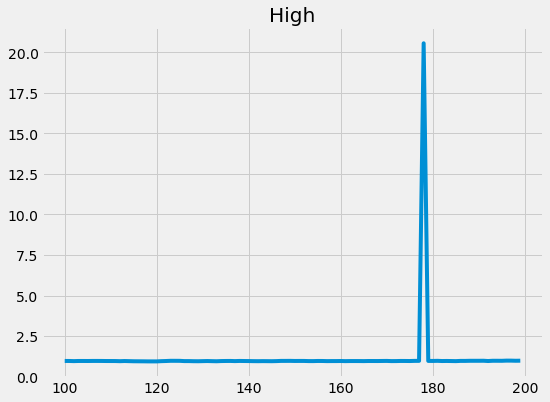

In [32]:
#handled missing data

zoom(column = 'High',scope=[100,200])

In [33]:
#anomaly detection using kmeans
import numpy as np

In [34]:
from  scipy.cluster.vq import kmeans
from scipy import cluster

def anomaly(column,clusters = 2):
    centroids,avg_distance = kmeans(df[column].values,clusters)
    groups,cdist = cluster.vq.vq(df[column].values,centroids)
    plt.title(column+'_ K means clustering')
    plt.scatter(range(df.shape[0]),df[column].values,c = groups)
    plt.show()



In [67]:
#anomaly('High')
#anomaly('Close')
#anomaly('Open')
#anomaly('Low')


In [36]:
# handling outliers
#first replace with nans and the interpolate
ot = 10 #outlier threshold, replace if greater than this

for column in df.columns:
  if df[column].dtypes == float:
    df[column] = np.where(df[column]>ot,np.nan,df[column])
df.interpolate()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-07-11,0.89961,0.90289,0.89840,0.90216,0.90216,0.0
1,2007-07-12,0.90220,0.90986,0.89935,0.90834,0.90834,0.0
2,2007-07-13,0.90831,0.91186,0.90801,0.91120,0.91120,0.0
3,2007-07-16,0.91186,0.91239,0.90733,0.90862,0.90862,0.0
4,2007-07-17,0.90868,0.91120,0.90733,0.90975,0.90975,0.0
...,...,...,...,...,...,...,...
3435,2020-09-09,5.76137,5.76137,5.74000,5.74000,5.74000,0.0
3436,2020-09-10,5.73164,5.75920,5.73164,5.74000,5.74000,0.0
3437,2020-09-11,5.76037,5.76037,5.74000,5.74000,5.74000,0.0
3438,2020-09-14,5.77092,5.77092,5.74000,5.74000,5.74000,0.0


In [37]:
print

<function print>

After Handling Outliers


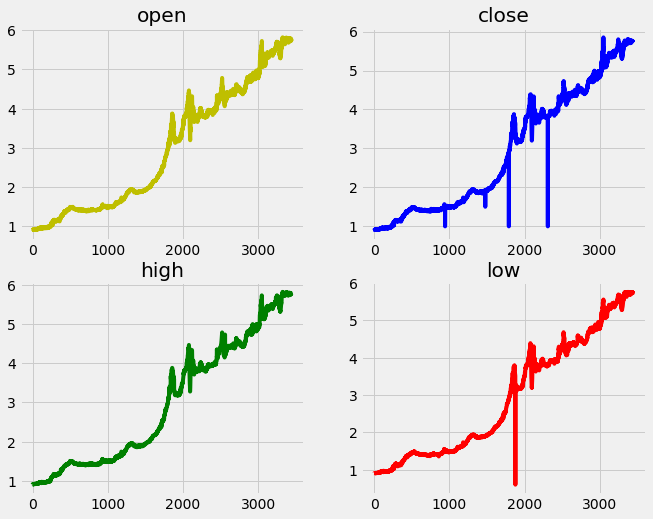

In [38]:
print('After Handling Outliers')

fig,axes= plt.subplots(2,2,figsize = (10,8))
axes[0,0].plot(range(df.shape[0]),df['Open'].values,color = 'y')
axes[0,1].plot(range(df.shape[0]),df['Close'].values,color = 'b')
axes[1,0].plot(range(df.shape[0]),df['High'].values,color = 'g')
axes[1,1].plot(range(df.shape[0]),df['Low'].values,color = 'r')
axes[0,0].set_title("open")
axes[0,1].set_title("close")
axes[1,0].set_title("high")
axes[1,1].set_title("low")
 

plt.show()


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3440.000000,3436.000000,3440.000000,3438.000000,3438.000000,3440.0
mean,2.945314,2.967382,2.931188,2.947281,2.947281,0.0
std,1.561933,1.573847,1.553916,1.564764,1.564764,0.0
min,0.899610,0.902890,0.600000,0.902160,0.902160,0.0
25%,1.460550,1.466750,1.455750,1.460075,1.460075,0.0
50%,2.482950,2.498250,2.465350,2.472500,2.472500,0.0
75%,4.364700,4.400000,4.355750,4.369525,4.369525,0.0
max,5.818130,5.818130,5.763620,5.850000,5.850000,0.0


#Build Time Series Model for forcasting exchange rates

LSTMS


In [40]:
#select opening exchange rates
data = df['Open']
data


0       0.89961
1       0.90220
2       0.90831
3       0.91186
4       0.90868
         ...   
3435    5.76137
3436    5.73164
3437    5.76037
3438    5.77092
3439    5.72900
Name: Open, Length: 3440, dtype: float64

In [41]:
data.shape

(3440,)

In [42]:
#zoom(column = 'Open',scope = )

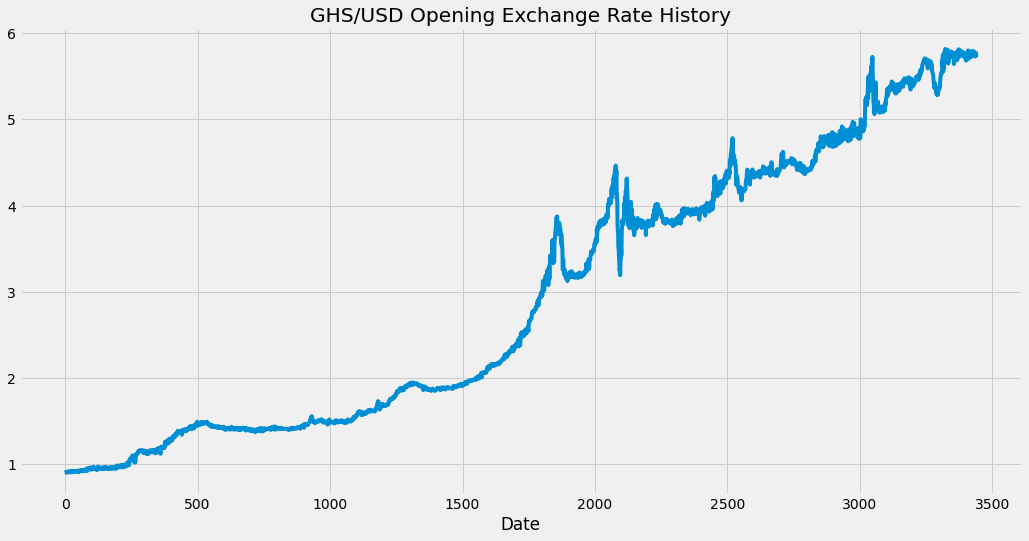

In [43]:
plt.figure(figsize= (16,8))
plt.title('GHS/USD Opening Exchange Rate History')
plt.plot(data)
plt.xlabel('Date')
plt.ylabel(str())
plt.show()

In [44]:
data.shape

(3440,)

In [45]:
#reshape data into one column feature
data_r = np.reshape(data.values,(-1,1))
data_r.shape

(3440, 1)

In [46]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_data = sc.fit_transform(data_r)
scaled_data

array([[0.00000000e+00],
       [5.26581167e-04],
       [1.76882477e-03],
       ...,
       [9.88256630e-01],
       [9.90401584e-01],
       [9.81878695e-01]])

In [47]:
#check scaling using means 
data.values.mean(),np.mean(scaled_data)

(2.9453144156976747, 0.41591869417989036)

In [48]:
#prepare time series as as as supervised learning problem
#make labels

timeseriesX = []
timeseriesY = []

timestep = 60
for i in range(timestep,len(scaled_data)):
  timeseriesX.append(scaled_data[i-timestep:i,-1])
  timeseriesY.append(scaled_data[i,-1])
timeseriesX = np.array(timeseriesX)
timeseriesY = np.array(timeseriesY)

print('Because',timestep,'observations per timestep was used,', timeseriesX.shape[0]-timestep,'trainable samples created from',timeseriesX.shape[0],'rows of the original data')
print('apparent percentage of data used               : ',(timeseriesX.shape[0]-timestep)/timeseriesX.shape[0])
print('apparent percentage of data lost in conversion : ',1-(timeseriesX.shape[0]-timestep)/timeseriesX.shape[0])
 

Because 60 observations per timestep was used, 3320 trainable samples created from 3380 rows of the original data
apparent percentage of data used               :  0.9822485207100592
apparent percentage of data lost in conversion :  0.017751479289940808


In [49]:
timeseriesX.shape#[0:3]

(3380, 60)

In [50]:
timeseriesX.shape

(3380, 60)

In [51]:
from math import ceil,floor
def split(data = None,test_size = 0.3):
    train = data[0:floor(data.shape[0]*(1-test_size))]
    test = data[ceil(data.shape[0]*(1-test_size)):-1]
    #print(floor(data.shape[0]*(1-test_size)))
    #print(ceil(data.shape[0]*(1-test_size)))
    return train,test

In [52]:
xtrain,xtest = split(timeseriesX)
ytrain,ytest = split(timeseriesY)


In [53]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2366, 60), (2366,), (1013, 60), (1013,))

In [54]:
#reshape training and testing input for LSTM input 3D

xtrain = np.reshape(xtrain,(xtrain.shape[0],timestep,1))
xtest = np.reshape(xtest,(xtest.shape[0],timestep,1))

ytrain = np.reshape(ytrain,(-1,1))
ytest = np.reshape(ytest,(-1,1))

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2366, 60, 1), (2366, 1), (1013, 60, 1), (1013, 1))

In [55]:
xtest

array([[[0.62128242],
        [0.61746013],
        [0.62197368],
        ...,
        [0.62065215],
        [0.63283061],
        [0.62014386]],

       [[0.61746013],
        [0.62197368],
        [0.61682986],
        ...,
        [0.63283061],
        [0.62014386],
        [0.622177  ]],

       [[0.62197368],
        [0.61682986],
        [0.61365817],
        ...,
        [0.62014386],
        [0.622177  ],
        [0.62337654]],

       ...,

       [[0.99162553],
        [0.99722884],
        [0.99226393],
        ...,
        [0.98859413],
        [0.9882363 ],
        [0.98845994]],

       [[0.99722884],
        [0.99226393],
        [0.9842107 ],
        ...,
        [0.9882363 ],
        [0.98845994],
        [0.98241544]],

       [[0.99226393],
        [0.9842107 ],
        [0.98518253],
        ...,
        [0.98845994],
        [0.98241544],
        [0.98825663]]])

In [56]:
timeseriesY.shape

(3380,)

In [57]:
#Build Time Series Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional
from keras.callbacks import ModelCheckpoint
from keras.metrics import RootMeanSquaredError


In [69]:
model = Sequential()
model.add(Bidirectional(LSTM(units=40,return_sequences=True,input_shape = (timestep,1))))
model.add(Bidirectional(LSTM(units=20,return_sequences=True)))
model.add(Bidirectional(LSTM(units=20,return_sequences=False)))
model.add(Dense(units = 20))
model.add(Dense(units = 5))
model.add(Dense(units = 1))
model.compile(optimizer= 'adam',loss = 'mean_squared_error',metrics = [RootMeanSquaredError(),'mse'])


In [70]:
#model.summary()

In [78]:
hist = model.fit(x = xtrain,y = ytrain,epochs=5,validation_data=(xtest,ytest),callbacks= ModelCheckpoint('forex.hdf5',save_best_only=True,mode = 'min',verbose = 1))

Epoch 1/5
74/74 [==============================] - ETA: 0s - loss: 2.0334e-04 - root_mean_squared_error: 0.0143 - mse: 2.0334e-04
Epoch 00001: val_loss improved from inf to 0.00202, saving model to forex.hdf5
74/74 [==============================] - 8s 107ms/step - loss: 2.0334e-04 - root_mean_squared_error: 0.0143 - mse: 2.0334e-04 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mse: 0.0020
Epoch 2/5
74/74 [==============================] - ETA: 0s - loss: 1.6840e-04 - root_mean_squared_error: 0.0130 - mse: 1.6840e-04
Epoch 00002: val_loss did not improve from 0.00202
74/74 [==============================] - 8s 106ms/step - loss: 1.6840e-04 - root_mean_squared_error: 0.0130 - mse: 1.6840e-04 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628 - val_mse: 0.0039
Epoch 3/5
74/74 [==============================] - ETA: 0s - loss: 1.9845e-04 - root_mean_squared_error: 0.0141 - mse: 1.9845e-04
Epoch 00003: val_loss did not improve from 0.00202
74/74 [====================

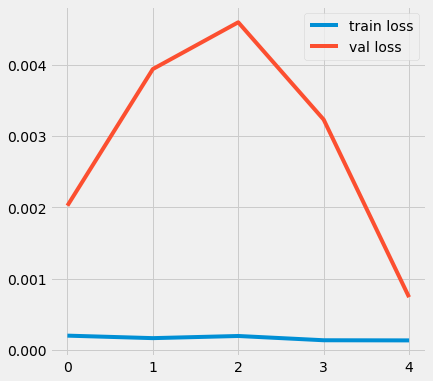

In [79]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train loss','val loss'])

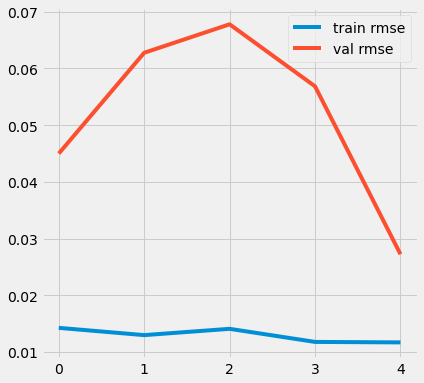

In [80]:
plt.figure(figsize=(6,6))
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.legend(['train rmse','val rmse'])

In [92]:
test_prediction = sc.inverse_transform(model.predict(xtest))
train_prediction = sc.inverse_transform(model.predict(xtrain))




Text(0, 0.5, 'GHC')

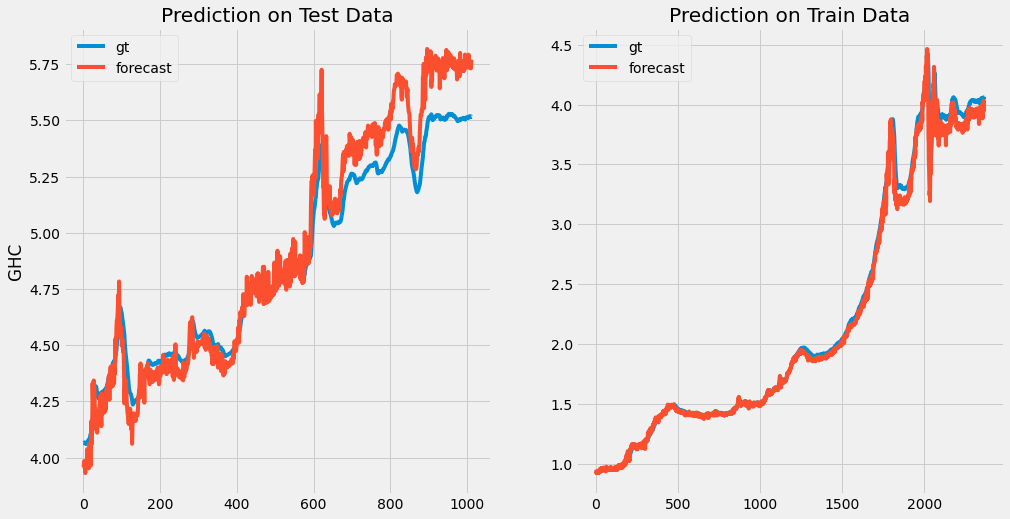

In [98]:
fig,axes= plt.subplots(1,2,figsize = (15,8))
axes[0].set_title('Prediction on Test Data')
axes[0].plot(range(len(test_prediction)),test_prediction)
axes[0].plot(range(len(test_prediction)),sc.inverse_transform(ytest))
axes[0].legend(['gt','forecast'])

axes[1].set_title('Prediction on Train Data')
axes[1].plot(range(len(train_prediction)),train_prediction)
axes[1].plot(range(len(train_prediction)),sc.inverse_transform(ytrain))
axes[1].legend(['gt','forecast'])
axes[0].set_ylabel('GHC')

In [102]:
#Evaluate testing and training fit

from sklearn.metrics import r2_score
print('r2 score\n-------- \ntest fit: ',r2_score(y_true = sc.inverse_transform(ytest),y_pred=prediction),'\ntrain fit: ',
r2_score(y_true = sc.inverse_transform(ytrain),y_pred=sc.inverse_transform(model.predict(xtrain))))

r2 score
-------- 
test fit:  0.9392135625484066 
train fit:  0.9946283583471768


In [77]:
#date at 1000 on test prediction

getDate(1000+len(xtrain)+timestep)

'2020-08-27'